
## Various plot for Visualization

### Quantitative:

1. Kernel Density plot
2. Histogram
3. Box plot 


### Categorical: 

1. Pie chart

### Quantitative vs. Quantitative
    1. Scatterplot
    2. Line plot

### Categorical vs. Quantitative
    1. Bar chart (on summary statistics)
    2. Grouped kernel density plots
    3. Box plots
    4. Violin plots


### Categorical vs. Categorical
    1. Stacked bar chart
    2. Grouped bar chart
    3. Segmented bar chart


## Case study 1


### Problem Feature:(Heart Disease)

### Data Set: 

   * age - age in years 
   * sex - (1 = male; 0 = female) 
   * cp - chest pain type 
   * trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
   * chol - serum cholestoral in mg/dl 
   * fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
   * restecg - resting electrocardiographic results 
   * exang - exercise induced angina (1 = yes; 0 = no) 
   * oldpeak - ST depression induced by exercise relative to rest 
   * slope - the slope of the peak exercise ST segment 
   * ca - number of major vessels (0-3) colored by flourosopy 
   * thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
   * target - have disease or not (1=yes, 0=no)



### 1.1 Loading the libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

### 1.2 import the dataset ?

In [2]:
df=pd.read_csv(r"C:\Users\$ubhajit\Downloads\heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 1.3 How to see the size of your data? 

In [4]:
df.shape

(303, 14)

Dataset contains 303 records and 14 attributes.

### 1.4 How to view the statistical characteristics of the data?  (1 mark)

In [5]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### 1.5  a) How to see just one column?

In [6]:
df[['age']].head()

,age
0,63
1,37
2,41
3,56
4,57


In [7]:
df[['age']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0


### 1.5 b) How to check the column names?

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### 1.5 c) Find the Numerical Features,Categorical Features, Alphanumeric Features?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Change the column names?

In [10]:
df.rename(columns={'age':'Age','sex':'Sex'},inplace=True)
df.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 1.6 Quantitative:  

### 1.6 a) Create kdeplot for showing age

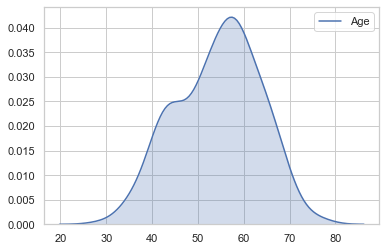

In [11]:
sns.kdeplot(df.Age, shade= True)

### 1.6 b) Create histogram for showing cholestrol with Number of bins 5

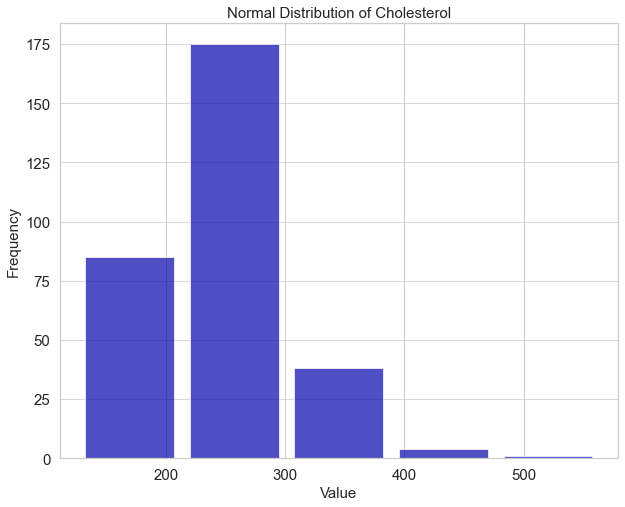

In [12]:
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=df.chol, bins=5, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Normal Distribution of Cholesterol',fontsize=15)
plt.show()

### 1.6 c) Create Boxplot for showing trestbps and comment what the dark spot indicate

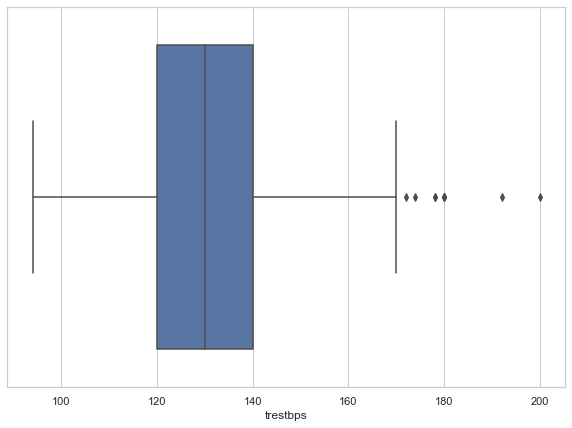

In [13]:
fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
sns.boxplot(df.trestbps) 
  
# show plot 
plt.show() 

Dark Spots are showing outliers of the data.

##  Categorical vs. Quantitative 

    * Categorical: chest_pain_type, Sex, fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_slope,thalassemia
    * Numerical Features: Age (Continuous), resting_blood_pressure ,cholesterol,max_heart_rate_achieved,st_depression, num_major_vessels,target

### 1.8a) Create bar plot for showing Gender and target. And your Observation:

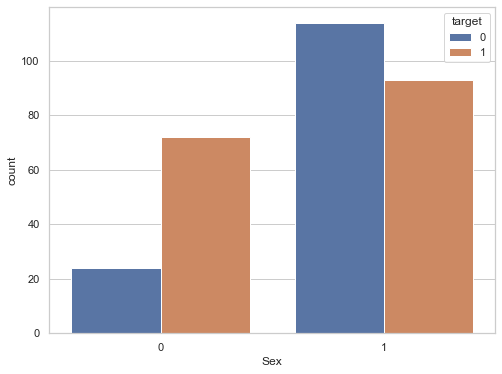

In [14]:

#draw a bar plot of target by sex
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Sex", hue="target", data=df)
plt.show()

In [15]:
#print percentages of females vs. males Heart Disease

hd=pd.crosstab(df.Sex, df.target ,margins=True,margins_name="Total" )
hd

target,0,1,Total
Sex,,,
0,24,72,96
1,114,93,207
Total,138,165,303


In [16]:
female_perc_hd=((hd[1][0]/(hd[1][0]+hd[1][1]))*100)
print("Percentage of Female Heart Disease patient= ", female_perc_hd)

male_perc_hd=((hd[1][1]/(hd[1][0]+hd[1][1]))*100)
print("Percentage of Male Heart Disease patient= ", male_perc_hd)


Percentage of Female Heart Disease patient=  43.63636363636363
Percentage of Male Heart Disease patient=  56.36363636363636


There were 303 people's info. Among them 165 people have heart disease. Out of these 165 people 72 are female(43.64%) and 93 male(56.36 %) who have heart diseases. percentage of male heart disease patients are more than female.

### Observation:



### 1.8b) Create Bar plot for checking the both target vs Sex.

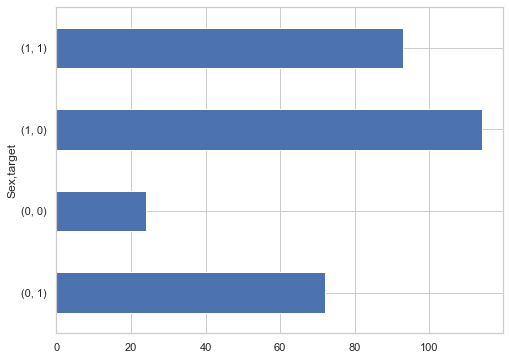

In [17]:
#create a subplot
f, ax = plt.subplots(figsize=(8, 6))
# create bar plot using groupby
df.groupby('Sex').target.value_counts().plot.barh()
plt.show()

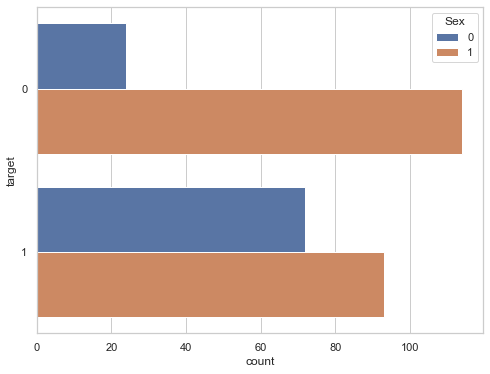

In [18]:
# create count plot
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="target", hue="Sex", data=df)
plt.show()

### 1.8 c) Create Bar plot for checking the both Number Of people having chest_pain_type vs chest_pain_type:Heart Disease or Not.

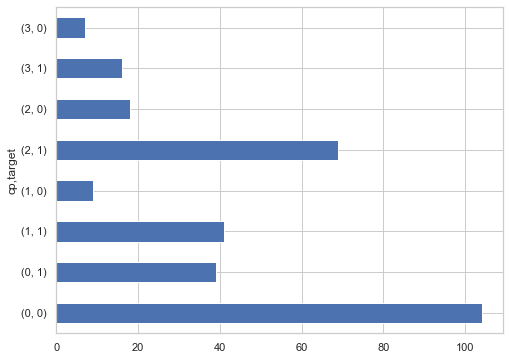

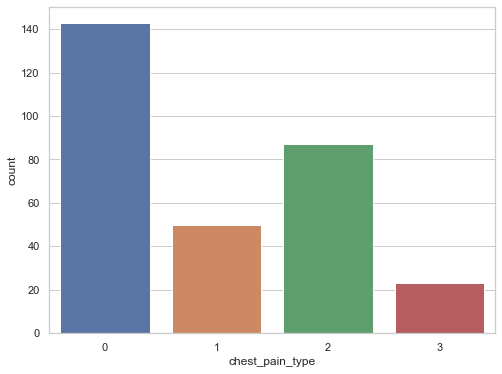

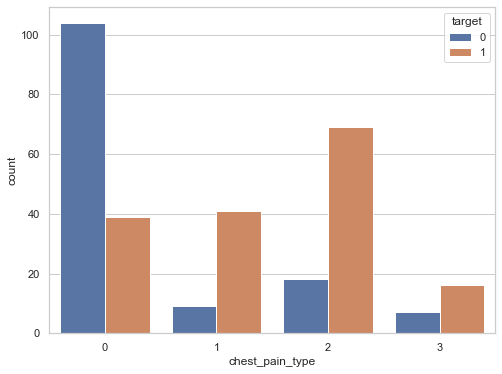

In [19]:
# create subplot plot
f, ax = plt.subplots(figsize=(8, 6))
# create bar plot using groupby
df.groupby('cp').target.value_counts().plot.barh()
plt.show()

# create count plot

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", data=df)
plt.xticks(rotation=360)
plt.xlabel("chest_pain_type")
plt.show()
# create count plot

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", hue="target", data=df)
plt.xticks(rotation=360)
plt.xlabel("chest_pain_type")
plt.show()

### 1.8 d) Create violinplot plot for checking the fasting_blood_sugar and Age vs target'

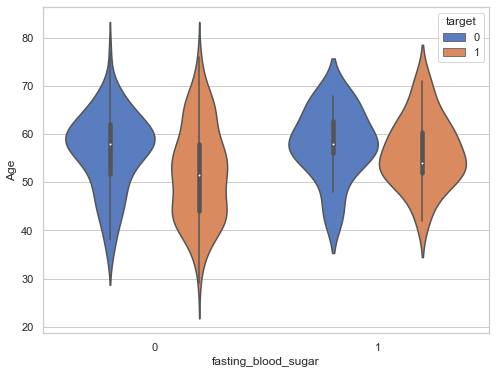

In [20]:
# create subplot plot
f, ax = plt.subplots(figsize=(8, 6))
# create violinplot plot using groupby
ax = sns.violinplot(x="fbs", y="Age", hue="target",data=df, palette="muted")
plt.xticks(rotation=360)
plt.xlabel("fasting_blood_sugar")
plt.ylabel("Age")
plt.show()

## Box Plot
a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, 

### 1.8 d)create a box plot for Sex & Age 

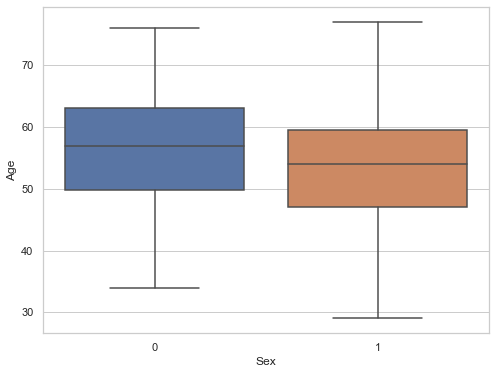

In [21]:
# create boxplot
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Sex", y="Age", data=df)
plt.show()

# 1.9 Categorical vs. Categorical 

* Categorical: target, Sex.

### Stacked bar chart

A stacked bar chart, also known as a stacked bar graph, is a graph that is used to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Different colors are used to illustrate the different categories in the bar.



### 1.9a) Create a Stacked bar chart for showing target & Sex

In [22]:
#create crosstab
hd=pd.crosstab(df.Sex, df.target ,margins=True,margins_name="Total" )
hd

target,0,1,Total
Sex,,,
0,24,72,96
1,114,93,207
Total,138,165,303


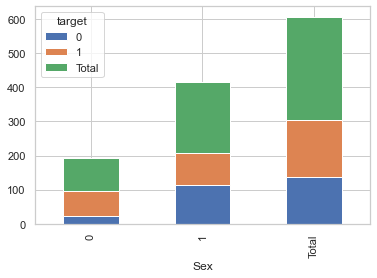

In [23]:
# stacked bar chat

hd.plot.bar(stacked=True)

# 1.10 Quantitative vs. Quantitative

### 1.10a) Create a scatter plot for showing age & st_depression

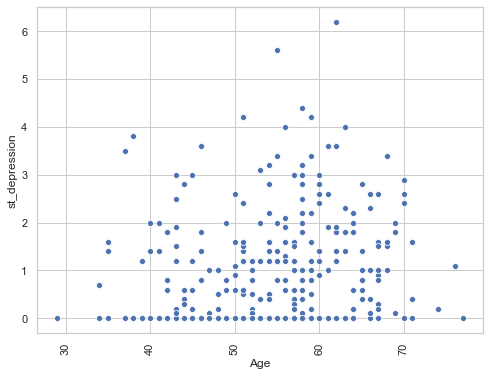

In [24]:
fig=plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Age', y = 'oldpeak', data = df)
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("st_depression")
plt.show()

# Overall  Observation   :
   

There are 303 people's information given in the dataset. ~55% people having heart diseases. Where number of male heart disease patient is greater than female heart disease patients. Who have high blood suger having more tendancy with heart disease.People who have type 2 chest pain have more tendancy of heart disease. ~75% female have heart disease among all 96 female.Some outliers are found in resting blood preassure on admission in hospital. People with the age range 55 to 60 are max in number. Overall data visualisation helps us to identify and understand the dataset in a very clear way.

# THE END